# Análise Exploratória de Dados - Consumidor.gov



#### Perguntas a serem respondidas:

- Como é a distribuição das reclamações pelo país?
- Quais os segmentos com maior número de reclamações?
- Qual o perfil dos reclamantes?
- Qual o tempo médio de resposta por segmento?
- Quais as empresas com mais reclamações e sua nota média de avaliação dos clientes?
- Há relação entre a nota de avaliação e o tempo de resposta?

#### Leitura dos dados

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dados/base_final.csv')

In [4]:
df.head()

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,grupo_problema,como_comprou_contratou,procurou_empresa,situacao,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Não comprei / contratei,S,Finalizada não avaliada,Não Avaliada,0.0
1,BA,F,entre 31 a 40 anos,10.0,iFood,Empresas de Intermediação de Serviços / Negócios,Entrega do Produto,Internet,S,Finalizada não avaliada,Não Avaliada,0.0
2,BA,F,entre 51 a 60 anos,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Telefone,S,Finalizada não avaliada,Não Avaliada,0.0
3,PE,F,entre 61 a 70 anos,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Loja física,S,Finalizada não avaliada,Não Avaliada,0.0
4,PE,F,entre 51 a 60 anos,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Loja física,S,Finalizada não avaliada,Não Avaliada,0.0


### Análises

In [5]:
# verificando os tipos de dados do dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272347 entries, 0 to 272346
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   uf                      272347 non-null  object 
 1   sexo                    272347 non-null  object 
 2   faixa_etaria            272347 non-null  object 
 3   tempo_resposta          272347 non-null  float64
 4   nome_fantasia           272347 non-null  object 
 5   segmento_de_mercado     272347 non-null  object 
 6   grupo_problema          272347 non-null  object 
 7   como_comprou_contratou  272347 non-null  object 
 8   procurou_empresa        272347 non-null  object 
 9   situacao                272347 non-null  object 
 10  avaliacao_reclamacao    272347 non-null  object 
 11  nota_do_consumidor      272347 non-null  float64
dtypes: float64(2), object(10)
memory usage: 24.9+ MB


In [6]:
df.describe()

,tempo_resposta,nota_do_consumidor
count,272347.000000,272347.000000
mean,6.327156,1.257701
std,3.040102,1.853561
min,0.000000,0.000000
25%,4.000000,0.000000
50%,7.000000,0.000000
75%,9.000000,1.000000
max,11.000000,5.000000


#### Emissões por estado

In [7]:
emissoes_estado = df['uf'].value_counts().reset_index()
emissoes_estado.columns = ['estado', 'num reclamações']

total_reclamacoes = len(df)
emissoes_estado['percentual reclamações'] = (emissoes_estado['num reclamações']/total_reclamacoes) * 100

emissoes_estado

,estado,num reclamações,percentual reclamações
0,SP,58474,21.470404
1,MG,31200,11.455973
2,RJ,28851,10.593471
3,PR,22382,8.218192
4,BA,15930,5.849156
5,RS,13982,5.133892
6,DF,13566,4.981145
7,SC,12888,4.732198
8,GO,9351,3.433487
9,CE,8541,3.136073


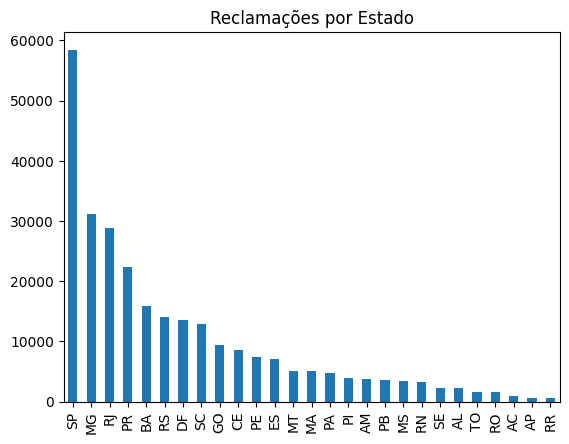

In [8]:
df['uf'].value_counts().plot.bar()
plt.title('Reclamações por Estado')
plt.xlabel(None)
plt.show()

#### Reclamações por segmento

In [9]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,grupo_problema,como_comprou_contratou,procurou_empresa,situacao,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Não comprei / contratei,S,Finalizada não avaliada,Não Avaliada,0.0


In [10]:
# calculando os 10 segmentos com mais reclamacoes
reclamacoes_segmento = df['segmento_de_mercado'].value_counts().reset_index()
reclamacoes_segmento.columns = ['segmento', 'num_reclamacoes']

reclamacoes_segmento['percentual_reclamacoes'] = (reclamacoes_segmento['num_reclamacoes']/total_reclamacoes) * 100
reclamacoes_segmento['percentual_acumulado'] = (reclamacoes_segmento['num_reclamacoes'].cumsum()/reclamacoes_segmento['num_reclamacoes'].sum()) * 100

top10_segmentos = reclamacoes_segmento.nlargest(10, 'num_reclamacoes')
top10_segmentos

,segmento,num_reclamacoes,percentual_reclamacoes,percentual_acumulado
0,"Bancos, Financeiras e Administradoras de Cartão",80261,29.470125,29.470125
1,"Operadoras de Telecomunicações (Telefonia, Int...",35211,12.928727,42.398851
2,Comércio Eletrônico,20000,7.343573,49.742424
3,Transporte Aéreo,17843,6.551568,56.293993
4,Energia Elétrica,13206,4.848961,61.142954
5,"Seguros, Capitalização e Previdência",10340,3.796627,64.939581
6,Provedores de Conteúdo e Outros Serviços na In...,9832,3.610100,68.549681
7,Empresas de Pagamento Eletrônico,9546,3.505087,72.054768
8,Empresas de Intermediação de Serviços / Negócios,9084,3.335451,75.390219
9,Programas de Fidelidade,8812,3.235578,78.625797


In [11]:
top10_segmentos.loc[1, 'segmento'] = 'Operadoras de Telecomunicações'

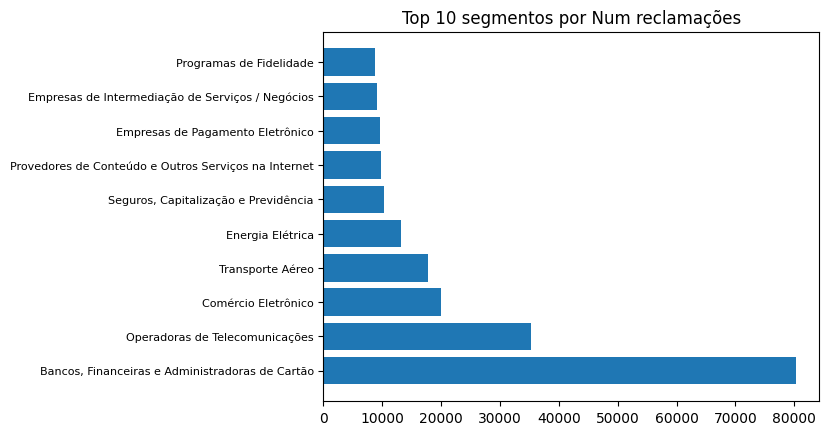

In [12]:

plt.barh(top10_segmentos['segmento'], top10_segmentos['num_reclamacoes'])
plt.title('Top 10 segmentos por Num reclamações')
plt.yticks(top10_segmentos.index, top10_segmentos['segmento'], ha='right', fontsize=8)
plt.xlabel(None)
plt.show()

#### Reclamações por empresa

In [13]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,grupo_problema,como_comprou_contratou,procurou_empresa,situacao,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Não comprei / contratei,S,Finalizada não avaliada,Não Avaliada,0.0


In [14]:
# calculando os 10 segmentos com mais reclamações
reclamacoes_empresas = df['nome_fantasia'].value_counts().reset_index()
reclamacoes_empresas.columns = ['nome_fantasia', 'num_reclamacoes']

top10_empresas = reclamacoes_empresas.nlargest(10, 'num_reclamacoes')
top10_empresas

,nome_fantasia,num_reclamacoes
0,Vivo - Telefônica,8942
1,Claro Celular,7014
2,Tim,6759
3,Caixa Econômica Federal,6176
4,Claro Residencial,5649
5,Google,5343
6,Latam Airlines (Tam),5228
7,Banco Santander,5179
8,Banco Bradesco,5036
9,Nubank,4831


In [15]:
# Calculando a nota média das empresas
# Filtrando as notas no intervalo de 1 a 5
df_notas = df[(df['nota_do_consumidor'] >= 1) & (df['nota_do_consumidor'] <= 5)]

# Calculando a média das notas para cada empresa
media_notas = df_notas.groupby('nome_fantasia')['nota_do_consumidor'].mean().sort_values(ascending=False).reset_index()

media_notas

,nome_fantasia,nota_do_consumidor
0,Rinnai,5.0
1,Editora Escala,5.0
2,Alfa Previdência e Vida,5.0
3,Senac - Santa Catarina,5.0
4,Unimed Costa Oeste,5.0
...,...,...
924,Editora Moderna,1.0
925,Living,1.0
926,Instituto Mix de Profissões,1.0
927,Via Veneto,1.0


In [16]:
# Realizando a junção dos dataframes para construir a tabela final
rec_empresas_final = pd.merge(top10_empresas, media_notas, on='nome_fantasia', how='left')
rec_empresas_final

,nome_fantasia,num_reclamacoes,nota_do_consumidor
0,Vivo - Telefônica,8942,3.922404
1,Claro Celular,7014,3.683036
2,Tim,6759,3.832563
3,Caixa Econômica Federal,6176,3.073651
4,Claro Residencial,5649,3.486092
5,Google,5343,3.341483
6,Latam Airlines (Tam),5228,3.740502
7,Banco Santander,5179,2.322061
8,Banco Bradesco,5036,2.301808
9,Nubank,4831,2.432289


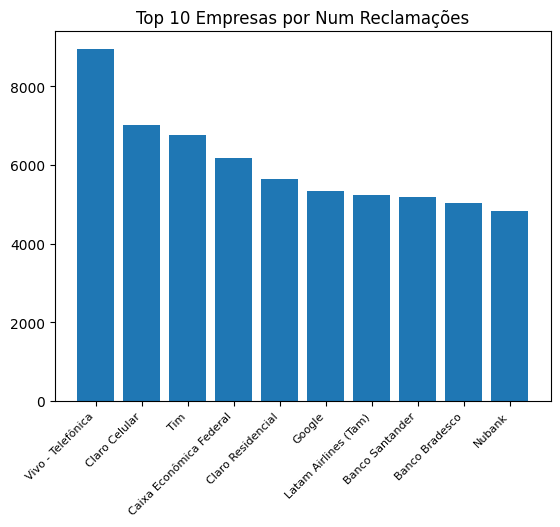

In [17]:
plt.bar(rec_empresas_final['nome_fantasia'], rec_empresas_final['num_reclamacoes'])
plt.title('Top 10 Empresas por Num Reclamações')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel(None)
plt.show()

#### Tempo médio de resposta por segmento

In [18]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,grupo_problema,como_comprou_contratou,procurou_empresa,situacao,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Não comprei / contratei,S,Finalizada não avaliada,Não Avaliada,0.0


In [25]:
tm_segmento = df.groupby('segmento_de_mercado')['tempo_resposta'].mean().round(2).sort_values(ascending=False).reset_index()
tm_segmento.columns = ['segmento', 'tempo_resposta']
tm_segmento

,segmento,tempo_resposta
0,"Operadoras de Telecomunicações (Telefonia, Int...",7.69
1,Serviços Esportivos,7.37
2,Provedores de Conteúdo e Outros Serviços na In...,7.35
3,Supermercados,7.31
4,Operadoras de Planos de Saúde e Administradora...,7.28
5,Aluguel de Carros,7.24
6,Varejo,7.09
7,Comércio Eletrônico,6.89
8,Editoras e Veículos de Imprensa,6.87
9,"Montadoras, Concessionárias e Prestadores de S...",6.77


In [28]:
tm_segmento.loc[0, 'segmento'] = 'Operadoras de Telecomunicações'

In [26]:
top10_segmentos

,segmento,num_reclamacoes,percentual_reclamacoes,percentual_acumulado
0,"Bancos, Financeiras e Administradoras de Cartão",80261,29.470125,29.470125
1,Operadoras de Telecomunicações,35211,12.928727,42.398851
2,Comércio Eletrônico,20000,7.343573,49.742424
3,Transporte Aéreo,17843,6.551568,56.293993
4,Energia Elétrica,13206,4.848961,61.142954
5,"Seguros, Capitalização e Previdência",10340,3.796627,64.939581
6,Provedores de Conteúdo e Outros Serviços na In...,9832,3.610100,68.549681
7,Empresas de Pagamento Eletrônico,9546,3.505087,72.054768
8,Empresas de Intermediação de Serviços / Negócios,9084,3.335451,75.390219
9,Programas de Fidelidade,8812,3.235578,78.625797


In [29]:
tm_top10 = pd.merge(top10_segmentos, tm_segmento, on='segmento', how='left')
tm_top10

,segmento,num_reclamacoes,percentual_reclamacoes,percentual_acumulado,tempo_resposta
0,"Bancos, Financeiras e Administradoras de Cartão",80261,29.470125,29.470125,6.45
1,Operadoras de Telecomunicações,35211,12.928727,42.398851,7.69
2,Comércio Eletrônico,20000,7.343573,49.742424,6.89
3,Transporte Aéreo,17843,6.551568,56.293993,4.89
4,Energia Elétrica,13206,4.848961,61.142954,6.21
5,"Seguros, Capitalização e Previdência",10340,3.796627,64.939581,6.37
6,Provedores de Conteúdo e Outros Serviços na In...,9832,3.610100,68.549681,7.35
7,Empresas de Pagamento Eletrônico,9546,3.505087,72.054768,6.58
8,Empresas de Intermediação de Serviços / Negócios,9084,3.335451,75.390219,6.41
9,Programas de Fidelidade,8812,3.235578,78.625797,5.49


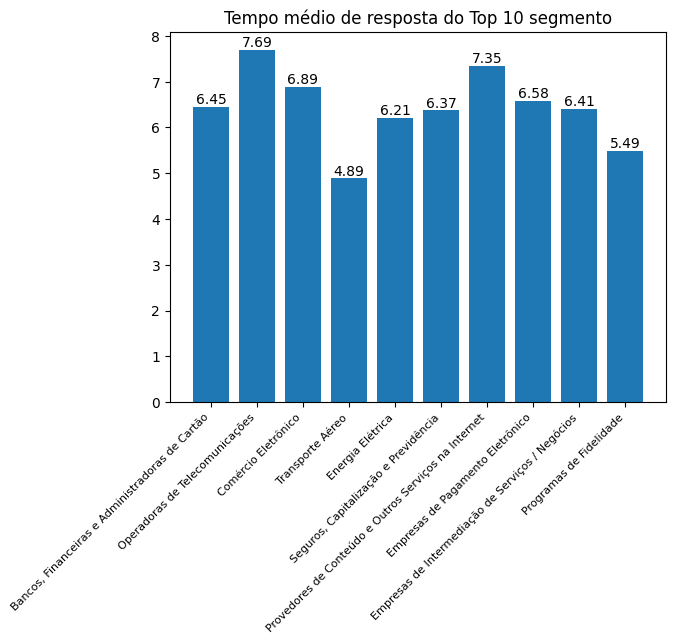

In [30]:
plt.bar(tm_top10['segmento'], tm_top10['tempo_resposta'])
plt.title('Tempo médio de resposta do Top 10 segmento')
plt.xticks(fontsize=8, rotation=45, ha='right')
for i, valor in enumerate(tm_top10['tempo_resposta']):
    plt.annotate(str(valor), xy=(i, valor), ha='center', va='bottom')
plt.show()

#### Perfil dos reclamantes

In [31]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,grupo_problema,como_comprou_contratou,procurou_empresa,situacao,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Cobrança / Contestação,Não comprei / contratei,S,Finalizada não avaliada,Não Avaliada,0.0


Distribuição por faixa etária

In [54]:
rec_idade = df.faixa_etaria.value_counts().reset_index()
total_rec = len(df)
rec_idade.columns = ['faixa_etaria', 'num_reclamacoes']
rec_idade['percentual'] = (rec_idade.num_reclamacoes/total_rec) * 100
rec_idade


,faixa_etaria,num_reclamacoes,percentual
0,entre 31 a 40 anos,93300,34.257767
1,entre 21 a 30 anos,62090,22.798122
2,entre 41 a 50 anos,60560,22.236338
3,entre 51 a 60 anos,28839,10.589065
4,entre 61 a 70 anos,17672,6.488781
5,mais de 70 anos,6679,2.452386
6,até 20 anos,3207,1.177542


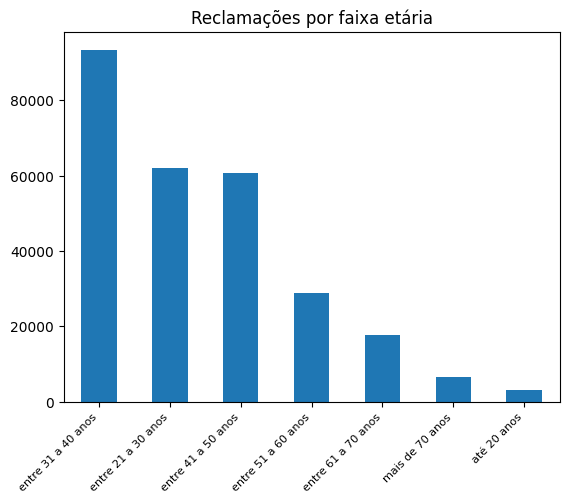

In [34]:
df.faixa_etaria.value_counts().plot.bar()
plt.title('Reclamações por faixa etária')
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.xlabel(None)
plt.show()

Distribuição por sexo

In [53]:
rec_sexo = df.sexo.value_counts().reset_index()
rec_sexo.columns = ['sexo', 'num_reclamacoes']
rec_sexo['percentual'] = (rec_sexo.num_reclamacoes/total_rec) * 100
rec_sexo

,sexo,num_reclamacoes,percentual
0,M,159494,58.562789
1,F,112644,41.360470
2,O,209,0.076740


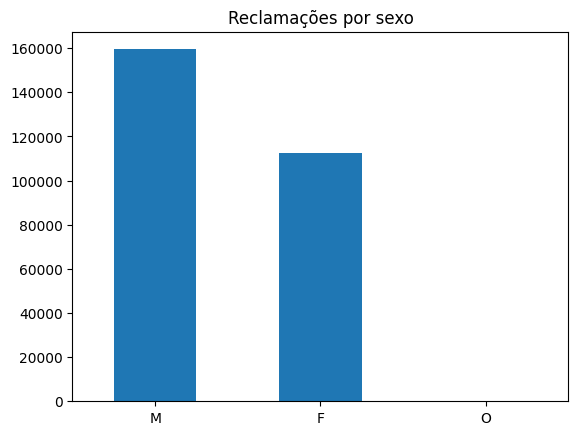

In [39]:
df.sexo.value_counts().plot.bar()
plt.title('Reclamações por sexo')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.show()

Distribuição origem compra

In [52]:
rec_origem = df.como_comprou_contratou.value_counts().reset_index()
rec_origem.columns = ['origem_compra', 'num_reclamacoes']
rec_origem['percentual'] = (rec_origem.num_reclamacoes / total_rec) * 100
rec_origem

,origem_compra,num_reclamacoes,percentual
0,Internet,136242,50.025152
1,Não comprei / contratei,51256,18.820108
2,Loja física,43366,15.923069
3,Telefone,29370,10.784037
4,Domicílio,7215,2.649194
5,SMS / Mensagem de texto,1763,0.647336
6,Catálogo,1281,0.470356
7,Ganhei de presente,1182,0.434005
8,"Stand, feiras e eventos",672,0.246744


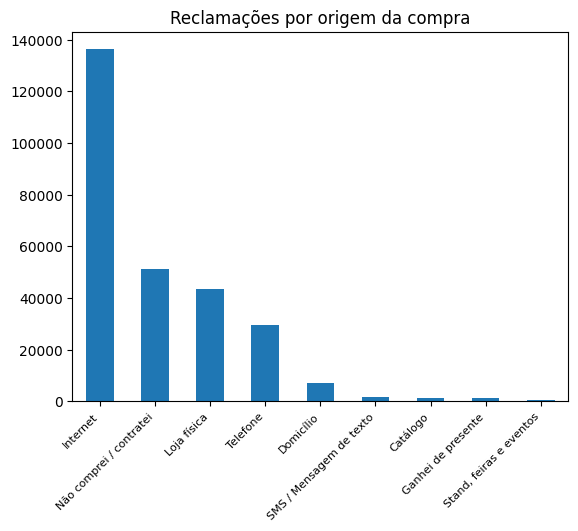

In [45]:
df.como_comprou_contratou.value_counts().plot.bar()
plt.title('Reclamações por origem da compra')
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.xlabel(None)
plt.show()

Distribuição por procura às empresas

In [55]:
rec_procura = df.procurou_empresa.value_counts().reset_index()
rec_procura.columns = ['procurou_empresa', 'quantidade']
rec_procura['percentual'] = (rec_procura.quantidade/total_rec) * 100
rec_procura


,procurou_empresa,quantidade,percentual
0,S,236645,86.890988
1,N,35702,13.109012


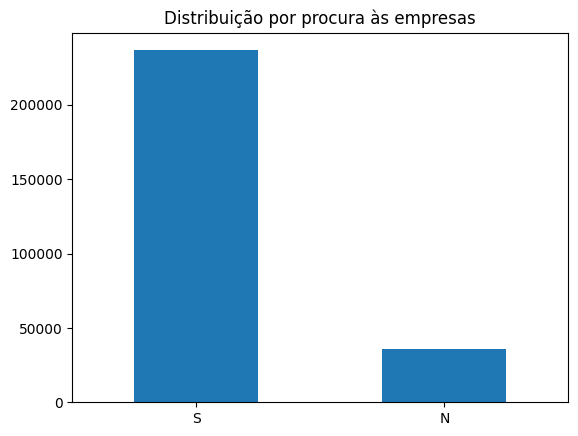

In [47]:
df.procurou_empresa.value_counts().plot.bar()
plt.title('Distribuição por procura às empresas')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.show()